# 📊 S&P 500 Analysis Project

## Introduction

The S&P 500, or Standard & Poor's 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. This project aims to analyze various aspects of the S&P 500 companies, including stock performance, sector analysis, and employment statistics.

## 📂 Datasets

We utilized three datasets for this analysis:
1. **Stocks**: Contains historical stock data for 503 companies.
   - Columns: `date`, `symbol`, `adjclose`, `high`, `low`, `open`, `volume`
   - Rows: 1,830,417
2. **Index**: Contains historical data of the S&P 500 index.
   - Columns: `date`, `S&P500`
   - Rows: 2,517
3. **Companies**: Contains detailed information about the companies listed in the S&P 500.
   - Columns: `exchange`, `symbol`, `shortname`, `longname`, `sector`, `industry`, `currentprice`, `marketcap`, `ebitda`, `revenuegrowth`, `city`, `state`, `country`, `fulltimeemployees`, `longbusinesssummary`, `weight`
   - Rows: 503

## 🎯 Objectives

The objectives of this project include:
- Calculating the Compound Annual Growth Rate (CAGR) of the S&P 500 index and individual companies.
- Identifying companies that outperform the S&P 500 index.
- Highlighting the best investment options based on historical performance.
- Analyzing the sectors and industries for growth.
- Determining companies with the highest employment.
- Assessing the market cap and revenue growth of the companies.
- Examining the geographic distribution of companies.

## 🛠️ Methodology

### Data Import

We imported the datasets from Kaggle using the Kaggle library in Python.

### Data Cleaning

#### Handling Null Values

1. **Stocks Dataset**: Some companies were listed after 2010-01-04, the start date of our data. We analyzed and removed these null values as they do not impact the overall dataset.
2. **Companies Dataset**:
   - `Revenuegrowth`: Calculated the revenue growth for the company with the null value using the mean percentage change of the `adjclose` column.
   - `Ebitda`: Imputed 29 null values from the financial services sector using the median due to the skewed distribution and presence of outliers.
   - `State`: Manually filled 19 null values based on the corresponding city.
   - `Fulltimeemployees`: Manually filled 4 null values using data from reliable sources as the numbers matched Google results.

### Analysis Steps

1. Calculated the CAGR of the S&P 500 index and individual companies.
2. Filtered stocks that have been listed for more than 10 years.
3. Analyzed sectors and industries for growth.
4. Determined the best investment options based on historical CAGR.
5. Conducted a detailed analysis of Tesla, NVIDIA, and Broadcom Inc.
6. Visualized the data to identify trends and insights.

## 🔍 Observations

### Index Observations

- The CAGR of the S&P 500 index is 10.8%.
- **2021** was the best year with a 1010-point increase.
- **2022** saw a significant drop of 922 points.
- The market recovered in 2023 with a 930-point increase.
- **March 2020** experienced a 19% downfall due to the pandemic.
- **June 2020** had a 6.3% return as the market recovered.

### Stock Observations

- After filtering, 469 stocks met the criteria of being listed for more than 10 years.
- **Top Performers**: NVIDIA (49% CAGR), Tesla (40% CAGR), Broadcom Inc. (40% CAGR).
- **Highly Volatile Stock**: Tesla showed significant fluctuations in recent years.

### Companies Analysis

- **Best Performing Sectors**: Analyzed based on the average CAGR.
- **Max Employment**: Walmart, Amazon, and Accenture are the top employers.
- **Market Cap**: NVIDIA, Microsoft, and Apple have the highest market caps.
- **Revenue Growth**: NVIDIA, Super Micro Computer, and Blackstone lead in revenue growth.
- **Geographic Distribution**: Analysis of companies listed in the S&P 500 by country.
- **Most Expensive Stock**: NVR, Inc.

## 📈 Insights

- The S&P 500 index has shown consistent growth over the years with an average CAGR of 10.8%.
- **Best Investment Options**: Based on historical performance, NVIDIA and Broadcom Inc. are the top stocks to consider.
- **Highest Growing Industries**: Rental & Leasing Services, Trucking, Consumer Electronics (with limited companies). The best option with multiple companies is Software - Application and Semiconductor.
- **Top Employers**: Walmart, Amazon, and Accenture.
- **Top Market Cap Companies**: NVIDIA, Microsoft, and Apple.
- **Top Revenue Growth**: NVIDIA, Super Micro Computer, and Blackstone.

## 🚀 Conclusion

This project provides a comprehensive analysis of the S&P 500 companies, highlighting key insights that can inform investment decisions. By understanding the growth patterns, sector performance, and employment statistics, we can make more informed choices in the stock market.

---

In [252]:
import kaggle
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import scipy.stats as st 

In [3]:
# Download the Dataset in the System
!kaggle datasets download andrewmvd/sp-500-stocks

2024-07-15 17:49:07,318 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002894A003B10>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)")': /api/v1/datasets/metadata/andrewmvd/sp-500-stocks
2024-07-15 17:49:07,319 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002894A0041D0>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)")': /api/v1/datasets/metadata/andrewmvd/sp-500-stocks
2024-07-15 17:49:07,319 WARNING Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002894A0047D0>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)")

In [4]:
Zip_ref = zipfile.ZipFile("sp-500-stocks.zip")
Zip_ref.extractall()
Zip_ref.close()

In [5]:
Stocks = pd.read_csv("sp500_stocks.csv", parse_dates=['Date'])
Index = pd.read_csv("sp500_index.csv",parse_dates=['Date'])
Companies = pd.read_csv("sp500_companies.csv")

<div align="center">
    <h1>Initial Data Exploration</h1>
</div>

In [6]:
Stocks.head(2)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0


In [7]:
Index.head(2)

,Date,S&P500
0,2014-06-19,1959.48
1,2014-06-20,1962.87


In [8]:
Companies.head(2)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,135.58,3335037648896,4.927500e+10,2.621,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.065292
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,446.34,3317337161728,1.259820e+11,0.170,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064945


In [9]:
# Analyse the Shape (Rows & Columns) of all dataset
print('Stocks:', Stocks.shape)   #18+ Lakhs rows
print('Index:', Index.shape)
print('Comapnies:', Companies.shape)

Stocks: (1830417, 8)
Index: (2517, 2)
Comapnies: (503, 16)


In [10]:
#Analyse Number of Unique Companies in Stocks and Companies Dataset
print('Stocks Dataset have',Stocks["Symbol"].nunique(), 'No of Companeis')
print('Companies Dataset have',Companies["Symbol"].nunique(), 'No of Companeis')

Stocks Dataset have 503 No of Companeis
Companies Dataset have 503 No of Companeis


In [11]:
# Number of companies matching in both datasets
# We have 503 different companies

<div align="center">
    <h1>Data Preprocessing</h1>
    
</div>

In [12]:
# Checking the Datatypes of Datasets
print('Datatypes of Index')
print(Index.dtypes, '\n')
print('Datatypes of Stocks')
print(Stocks.dtypes, '\n')
print('Datatypes of Companies')
print(Companies.dtypes, '\n')

Datatypes of Index
Date      datetime64[ns]
S&P500           float64
dtype: object 

Datatypes of Stocks
Date         datetime64[ns]
Symbol               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object 

Datatypes of Companies
Exchange                object
Symbol                  object
Shortname               object
Longname                object
Sector                  object
Industry                object
Currentprice           float64
Marketcap                int64
Ebitda                 float64
Revenuegrowth          float64
City                    object
State                   object
Country                 object
Fulltimeemployees      float64
Longbusinesssummary     object
Weight                 float64
dtype: object 



In [13]:
# Cheking the Duplicated Values
Stock_Duplicates_Values = Stocks.duplicated().sum()
Index_Duplicates_Values = Index.duplicated().sum()
Companies_Duplicates_Values = Companies.duplicated().sum()
print('Stock Dataset have ', Stock_Duplicates_Values, 'Duplicates Rows')
print('Index Dataset have ', Index_Duplicates_Values, 'Duplicates Rows')
print('Companies Dataset have ', Companies_Duplicates_Values, 'Duplicates Rows')

Stock Dataset have  0 Duplicates Rows
Index Dataset have  0 Duplicates Rows
Companies Dataset have  0 Duplicates Rows


We don't Have any Duplicates Rows in Each Dataset

In [14]:
# Checking the Null Values in the Dataset
print('Is #Stocks Dataset have Null Values:' , Stocks.isnull().sum().any())
print('Is #Index Dataset have Null Values:' , Index.isnull().sum().any())
print('Is #Companies Dataset have Null Values:' , Companies.isnull().sum().any())

Is #Stocks Dataset have Null Values: True
Is #Index Dataset have Null Values: False
Is #Companies Dataset have Null Values: True


#### Analyse and Treat the null values in the 'Stock' Dataset

In [15]:
# Checking for Null Values in Columns
Stocks.isnull().sum()

Date             0
Symbol           0
Adj Close    88780
Close        88780
High         88780
Low          88780
Open         88780
Volume       88780
dtype: int64

In [16]:
# Analyse How Many Stocks Have Null Values
Stock_Null = Stocks[Stocks["Adj Close"].isnull()] # Only Null Entries
Stock_Null["Symbol"].nunique() # Stocks Name that have Null Values

68

In [17]:
# Print the Stocks Name That have Null Values
Stock_Null["Symbol"].unique()

array(['ABBV', 'ABNB', 'ALLE', 'AMCR', 'APTV', 'ANET', 'CZR', 'CARR',
       'CTLT', 'CBOE', 'CDW', 'CHTR', 'CFG', 'CEG', 'CPAY', 'CTVA', 'DAY',
       'FANG', 'DOW', 'ENPH', 'EPAM', 'ETSY', 'FTV', 'FOXA', 'FOX',
       'GEHC', 'GEV', 'GNRC', 'GM', 'HCA', 'HPE', 'HLT', 'HWM', 'HII',
       'IR', 'INVH', 'IQV', 'KVUE', 'KEYS', 'KMI', 'KHC', 'LW', 'LYB',
       'MPC', 'META', 'MRNA', 'NWSA', 'NWS', 'NCLH', 'NXPI', 'OTIS',
       'PANW', 'PAYC', 'PYPL', 'PSX', 'QRVO', 'NOW', 'SOLV', 'SYF',
       'TRGP', 'TSLA', 'UBER', 'VLTO', 'VICI', 'VST', 'WRK', 'XYL', 'ZTS'],
      dtype=object)

In [18]:
# Almost every stock with null values has null values from the starting date.
Stock_Null[Stock_Null["Date"] == Stock_Null["Date"].min()]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
10917,2010-01-04,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
40029,2010-01-04,ABNB,NaN,NaN,NaN,NaN,NaN,NaN
58224,2010-01-04,ALLE,NaN,NaN,NaN,NaN,NaN,NaN
83697,2010-01-04,AMCR,NaN,NaN,NaN,NaN,NaN,NaN
149199,2010-01-04,APTV,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1724886,2010-01-04,VICI,NaN,NaN,NaN,NaN,NaN,NaN
1732164,2010-01-04,VST,NaN,NaN,NaN,NaN,NaN,NaN
1790388,2010-01-04,WRK,NaN,NaN,NaN,NaN,NaN,NaN
1812222,2010-01-04,XYL,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Only 2 Stocks with null Values has the Null Value in Last Date
Stock_Null[Stock_Null["Date"] == Stock_Null["Date"].max()]

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
778689,2024-03-28,GEV,NaN,NaN,NaN,NaN,NaN,NaN
1531962,2024-03-28,SOLV,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Means Some Stocks listed after "2010-01-04"
# and Some Stocks were DSelisted before 2024.

In [21]:
# Pick Up Any Random Stock that have Null Value - "ABBV"
Stock_Null[Stock_Null["Symbol"] == "ABBV"].head(2) # ABBV Stock values are null from 2010

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
10917,2010-01-04,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
10918,2010-01-05,ABBV,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Stock_Null[Stock_Null["Symbol"] == "ABBV"].tail(2) #ABBV Stock Have null Values till 2012
# Means This Stock is Listed in "2013-01-01"

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
11669,2012-12-28,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
11670,2012-12-31,ABBV,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Print All the Null Values of "GEV" Stock to Further Analysis
Stock_Null[Stock_Null["Symbol"] == "GEV"].tail() # Null till '2024-03-08'

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
778685,2024-03-22,GEV,NaN,NaN,NaN,NaN,NaN,NaN
778686,2024-03-25,GEV,NaN,NaN,NaN,NaN,NaN,NaN
778687,2024-03-26,GEV,NaN,NaN,NaN,NaN,NaN,NaN
778688,2024-03-27,GEV,NaN,NaN,NaN,NaN,NaN,NaN
778689,2024-03-28,GEV,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 'GEV' is Newly Listed Stock
#  Entries Start from '01-04-2024',Means This Stock is listed in 2024. before this date, All the Values are Null

In [25]:
# Pick Up Another Stock that Have Null Values
Stock_Null[Stock_Null["Symbol"] == "NWS"].head() # Null From 2010

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1229982,2010-01-04,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1229983,2010-01-05,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1229984,2010-01-06,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1229985,2010-01-07,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1229986,2010-01-08,NWS,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
Stock_Null[Stock_Null["Symbol"] == "NWS"].tail() # Null Till '2013-06-18'

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1230847,2013-06-12,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1230848,2013-06-13,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1230849,2013-06-14,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1230850,2013-06-17,NWS,NaN,NaN,NaN,NaN,NaN,NaN
1230851,2013-06-18,NWS,NaN,NaN,NaN,NaN,NaN,NaN


- Total companies that have null values are 68.
- There are 66 companies which were listed after 2010-01-04.
- There are 2 companies which have been delisted.
- We can remove these null rows; it doesn't affect our data.
- We don't want the delisted companies.

In [27]:
# Remove the Null Values from the Stock Dataset
Stocks.dropna(inplace=True)

In [28]:
# Remove the Companies that have been Delisted
# "GEV" & "SOLV"
Stocks = Stocks[(Stocks['Symbol'] != 'GEV') & (Stocks['Symbol'] != 'SOLV')]

In [29]:
Stocks["Symbol"].nunique() # Before We Had 503, Now We Have 501

501

In [30]:
# Again Analyse the Null Values
Stocks.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

#### Analyse and Treat the null values in the 'Companies' Dataset

In [31]:
# Print the Number of Null Values in Each Column
Companies.isnull().sum()
# There are 4 Columns that have Null Values.

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           1
City                    0
State                  19
Country                 0
Fulltimeemployees       4
Longbusinesssummary     0
Weight                  0
dtype: int64

- Handle the Null Value in 'Revenuegrowth' column


In [32]:
# Get the Company Symbol with Null Value
Null_value_of_RevGrw_in_Comapnies = Companies[Companies["Revenuegrowth"].isnull()] # Null Entry
Symbol_of_Null = Null_value_of_RevGrw_in_Comapnies ["Symbol"].values[0] #Symbol of Null Entry
Symbol_of_Null

'WDC'

In [33]:
#Get the Details of Stock that is null in Companies's Revenuegrowth column
Null_Company_Stock = Stocks[Stocks["Symbol"] == Symbol_of_Null]
Null_Company_Stock.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1786749,2010-01-04,WDC,36.334633,45.259998,45.799999,44.400002,44.400002,3118200.0
1786750,2010-01-05,WDC,37.297989,46.459999,47.439999,45.049999,45.349998,7048900.0
1786751,2010-01-06,WDC,37.330112,46.500000,46.900002,46.049999,46.540001,3996100.0
1786752,2010-01-07,WDC,36.599564,45.590000,46.500000,45.080002,46.400002,3626500.0
1786753,2010-01-08,WDC,36.784203,45.820000,45.840000,45.150002,45.490002,2521700.0


In [34]:
# Calculate the PCT of every day
Null_Company_Stock["Rv_Grow_Daily"] = Null_Company_Stock["Adj Close"].pct_change() 

C:\Users\busin\AppData\Local\Temp\ipykernel_10068\1470328925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Null_Company_Stock["Rv_Grow_Daily"] = Null_Company_Stock["Adj Close"].pct_change()


In [35]:
# Mean of PCT Change
# Revenue Growth of 'WDC'
WDC_rev =  Null_Company_Stock["Rv_Grow_Daily"].mean() 
WDC_rev

0.0005825965321011398

In [36]:
# Impute the Value in 'WDC''s  Revenuegrowth Column
Companies["Revenuegrowth"] = Companies["Revenuegrowth"].fillna(WDC_rev)

In [37]:
# Checking the Imputed Values
Companies[Companies["Symbol"] == "WDC"]["Revenuegrowth"]

300    0.000583
Name: Revenuegrowth, dtype: float64

- Handle the Null Value in 'State' column

In [38]:
# Count Null Values in State Column
Companies["State"].isnull().sum()
# 19 Values are null in the state column

19

In [39]:
# Analyse How Many Null Values are from each City
Null_State = Companies[Companies["State"].isnull()] # Null Data (State)
Null_State.groupby("City")["City"].count()

City
Cork            1
Dublin          7
Eindhoven       1
Hamilton        1
London          2
Pembroke        1
Schaffhausen    2
Swords          1
Woking          1
Zurich          2
Name: City, dtype: int64

In [40]:
# Analyse State Name from Different Entries. 
Cities_of_Null_State = list(Null_State["City"].unique()) # Cities With Null State
# Anayse that the Similar City have State in other Rows/Data
for i in Cities_of_Null_State:
    print(i, Companies[Companies["City"] == i][["State","Country"]], "\n") 

Woking    State         Country
34   NaN  United Kingdom 

Dublin     State        Country
44    NaN        Ireland
72    NaN        Ireland
94    NaN        Ireland
138   NaN        Ireland
176    CA  United States
307    OH  United States
326   NaN        Ireland
355   NaN        Ireland
468   NaN        Ireland 

Zurich     State      Country
90    NaN  Switzerland
420   NaN  Switzerland 

Swords     State  Country
117   NaN  Ireland 

Eindhoven     State      Country
132   NaN  Netherlands 

Cork     State  Country
192   NaN  Ireland 

Schaffhausen     State      Country
195   NaN  Switzerland
272   NaN  Switzerland 

Pembroke     State  Country
231   NaN  Bermuda 

London     State         Country
301   NaN  United Kingdom
433   NaN  United Kingdom 

Hamilton     State  Country
398   NaN  Bermuda 



In [41]:
# The state is Null for Each City, Meaning if a City has a Null State, Then the Same City has a Null State 
# throughout the Entire Dataset.

# So We Have To Find The State Of These Cities Manually.

In [42]:
# These are the cities who have null values in the State Column. 
City_State = {"Cork":"Munster",
              "Dublin":"province of Leinster",
              "Eindhoven":"North Brabant",
              "Hamilton":"Ontario",
              "London":"London",
              "Pembroke":"North California",
              "Schaffhausen":"Bodensee",
              "Swords":"province of Leinster",
              "Woking":"Surrey",
              "Zurich":"Zurich"     
              }

In [43]:
#Fill the Null Values in the State Column using Loop and Dictionary
for City,State in City_State.items():
    Companies.loc[Companies["City"] == City, "State"] = Companies.loc[Companies["City"] == City, "State"].fillna(State)

In [44]:
# Analyse Null Values after Imputing
Companies["State"].isnull().sum()

0

- Handle the Null Value in 'Ebitda' column

In [45]:
Companies["Ebitda"].isnull().sum()

29

In [46]:
# We Can't Calculate the EBITDA of Each Company Because of Lack of Information
# There are two options, we can impute the data or remove the date
#       - We can't remove the data because the company is one of the S&P500 listed companies.
#         There is no sense in the loss of data.
#       - We can impute the data, either using the Mean or Median.

In [47]:
# Mean of Ebitda for Each Sector
Companies.groupby("Sector")["Ebitda"].mean()

Sector
Basic Materials           3.610584e+09
Communication Services    2.354943e+10
Consumer Cyclical         5.725178e+09
Consumer Defensive        6.308449e+09
Energy                    1.210993e+10
Financial Services        7.493864e+09
Healthcare                5.660346e+09
Industrials               3.922060e+09
Real Estate               2.235259e+09
Technology                7.500573e+09
Utilities                 4.832576e+09
Name: Ebitda, dtype: float64

In [48]:
# Median of Ebitda for each Sector
Companies.groupby("Sector")["Ebitda"].median()

Sector
Basic Materials           2.922000e+09
Communication Services    5.152500e+09
Consumer Cyclical         2.481171e+09
Consumer Defensive        3.598000e+09
Energy                    6.401500e+09
Financial Services        3.180400e+09
Healthcare                2.765000e+09
Industrials               2.497000e+09
Real Estate               1.799369e+09
Technology                1.891000e+09
Utilities                 3.727000e+09
Name: Ebitda, dtype: float64

In [49]:
# Sectors With Null Values
Companies[Companies["Ebitda"].isnull()]["Sector"]

11     Financial Services
23     Financial Services
36     Financial Services
49     Financial Services
52     Financial Services
58     Financial Services
59     Financial Services
70     Financial Services
84     Financial Services
147    Financial Services
148    Financial Services
167    Financial Services
181    Financial Services
203    Financial Services
205    Financial Services
265    Financial Services
310    Financial Services
312    Financial Services
314    Financial Services
331    Financial Services
341    Financial Services
368    Financial Services
379    Financial Services
382    Financial Services
389    Financial Services
398    Financial Services
404    Financial Services
438    Financial Services
502    Financial Services
Name: Sector, dtype: object

In [50]:
# Analyse How Many Null Values are From only "Financial Sector"
len(Companies[Companies["Ebitda"].isnull()]["Sector"])
# All the Null Values in Ebitda are from Sector 'Financial services'

29

In [51]:
# Mean of Ebitda in Financial Sector
Fin_Ebidta_mean = Companies[Companies["Sector"] == 'Financial Services']["Ebitda"].mean()
Fin_Ebidta_mean

7493863754.378378

In [52]:
# Median of Ebitda in Financial Sector
Fin_Ebidta_median = Companies[Companies["Sector"] == 'Financial Services']["Ebitda"].median()
Fin_Ebidta_median 

3180400128.0

<Axes: >

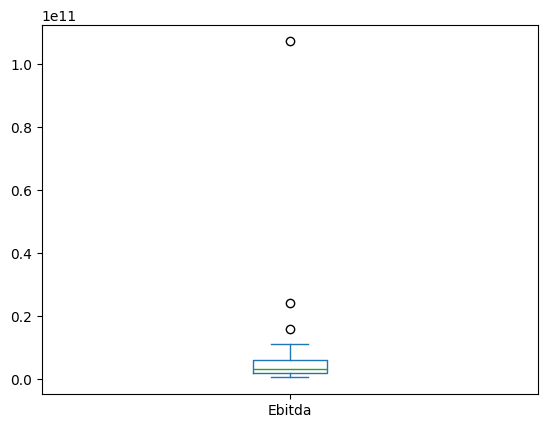

In [53]:
# Analysing Outliers
Companies[Companies["Sector"] == 'Financial Services']["Ebitda"].plot(kind="box")

<Axes: ylabel='Density'>

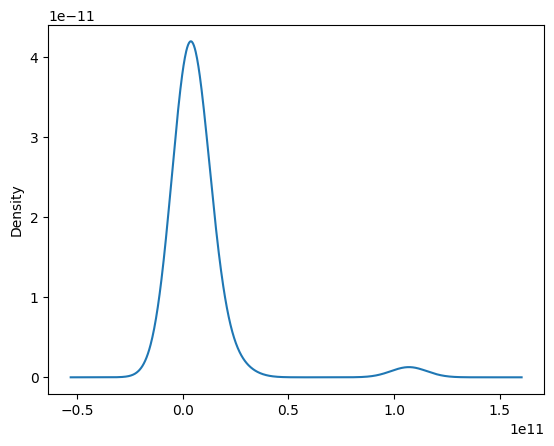

In [54]:
# KDE Plot
Companies[Companies["Sector"] == 'Financial Services']["Ebitda"].plot(kind="kde")

In [55]:
# Box Plot - There are 3 Outliers
# KDE Plot - The Distribution is Right-Skewed Distribution
# So, Mean is Highly Effected with Outliers
# Imputing Value with Median is a Good Option

In [56]:
# Imputing With Median
Companies["Ebitda"].fillna(Fin_Ebidta_median, inplace=True)

C:\Users\busin\AppData\Local\Temp\ipykernel_10068\766265988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Companies["Ebitda"].fillna(Fin_Ebidta_median, inplace=True)


In [57]:
Companies["Ebitda"].isnull().sum()

0

- Handle the Null Value in 'Fulltimeemployees' column

In [58]:
Companies["Fulltimeemployees"].isnull().sum()

4

In [59]:
Companies[Companies["Fulltimeemployees"].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
12,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,273.62,559853862912,2.394200e+10,0.099,San Francisco,CA,United States,NaN,Visa Inc. operates as a payment technology com...,0.010961
18,NYQ,ORCL,Oracle Corporation,Oracle Corporation,Technology,Software - Infrastructure,144.64,397544488960,2.221000e+10,0.033,Austin,TX,United States,NaN,Oracle Corporation offers products and service...,0.007783
269,NYQ,RMD,ResMed Inc.,ResMed Inc.,Healthcare,Medical Instruments & Supplies,212.27,31183951872,1.441419e+09,0.072,San Diego,CA,United States,NaN,"ResMed Inc. develops, manufactures, distribute...",0.000611
450,NYQ,SJM,The J.M. Smucker Company,The J. M. Smucker Company,Consumer Defensive,Packaged Foods,112.35,11931008000,1.882600e+09,-0.013,Orrville,OH,United States,NaN,The J. M. Smucker Company manufactures and mar...,0.000234


In [60]:
# Compare the Data with Google Search
print("NVIDIA Employees Count: ", list(Companies[Companies["Symbol"] == "NVDA"]["Fulltimeemployees"]))
print("Paramount Global Employees Count: ", list(Companies[Companies["Symbol"] == "PARA"]["Fulltimeemployees"]))
# In the Current Data, NVIDIA has 29600 employees, and According to Google, in 2024, NVIDEIA has 29600 employess
# In the Current Data, Paramount Global has 21900 Employees and According to Google, in 2024, Paramount Global has 21900 employees.

NVIDIA Employees Count:  [29600.0]
Paramount Global Employees Count:  [21900.0]


In [61]:
# So We can Google the employees count of 4 companies and fill them. 
# This also ensure the accuracy of data.
# Also, there are only 4 null values; if there are More Null values Then we will can follow some different method.

In [62]:
# Symbol of Null Values
Sym_of_Null_Entries = list(Companies[Companies["Fulltimeemployees"].isnull()]["Symbol"])
Sym_of_Null_Entries

['V', 'ORCL', 'RMD', 'SJM']

In [63]:
# Imputing the Data in "Fulltimeemployees" Column
Employees_Count = {"V":28800,"ORCL":164000,"RMD":10140,"SJM":9000}
for Sym, Emp_Cnt in Employees_Count.items():
    Companies.loc[Companies["Symbol"] == Sym, "Fulltimeemployees"] = Companies.loc[Companies["Symbol"] == Sym, "Fulltimeemployees"].fillna(Emp_Cnt)

In [64]:
# Re-Analyse Null Values in 'Fulltimeemployees' Column
Companies["Fulltimeemployees"].isnull().sum()

0

In [65]:
# Checking the Imputing Values
for i in Sym_of_Null_Entries:
    print(i,": ", Companies[Companies["Symbol"] == i]["Fulltimeemployees"])

V :  12    28800.0
Name: Fulltimeemployees, dtype: float64
ORCL :  18    164000.0
Name: Fulltimeemployees, dtype: float64
RMD :  269    10140.0
Name: Fulltimeemployees, dtype: float64
SJM :  450    9000.0
Name: Fulltimeemployees, dtype: float64


Now We Handled All the Null Values in all three Datasets. 
We Don't Have Null Values Remaining

<div align="center">
    <h1>Analyse the Data</h1>
    
</div>

In [66]:
# We will use "Business fiscal Year" which is start from 1 january and ends in 31 december.

In [67]:
# Set Date as Index
Stocks.set_index("Date", inplace=True)
Index.set_index("Date", inplace=True)

- Index

In [68]:
fig = px.line(Index, x=Index.index, y=Index["S&P500"], labels={'S&P500':'Price'},
               title="S&P500 Graph", line_shape="spline", color_discrete_sequence=["green"])
fig.update_layout(title={'text':'S&P500 Graph', 'x':0.5})
fig.show()

In [69]:
# Calculate the CAGR of INDEX
Start = Index["S&P500"].iloc[0]
End = Index["S&P500"].iloc[-1]
Years = (Index.index[-1] - Index.index[0]).days / 365.24
CAGR_of_Index = ((End / Start ) ** (1/Years) - 1 ) * 100
CAGR_of_Index

10.847154248559576

In [70]:
# Index Data from Jan-2015 to july-2024. 
Index = Index[Index.index >= '2015-01-01']

In [71]:
# Extract the Year
Index["Year"] = Index.index.year 

In [72]:
# Get the Last Date Value of Each Year
Index_Year = Index.resample("YE").last()
# Get the Value Change of Every Year
Index_Year["diff"] = Index_Year["S&P500"].diff()
Index_Year

,S&P500,Year,diff
Date,,,
2015-12-31,2043.94,2015,NaN
2016-12-31,2238.83,2016,194.89
2017-12-31,2673.61,2017,434.78
2018-12-31,2506.85,2018,-166.76
2019-12-31,3230.78,2019,723.93
2020-12-31,3756.07,2020,525.29
2021-12-31,4766.18,2021,1010.11
2022-12-31,3839.50,2022,-926.68
2023-12-31,4769.83,2023,930.33


In [73]:
fig = px.line(Index_Year,x="Year",y="S&P500",markers=True, color_discrete_sequence=["green"],
        title="Yearly Average Stock Price",line_shape="spline")
fig.update_layout(title={'text':'Yearly Average Stock Price', 'x':0.5})

fig2 = px.line(Index_Year,x="Year",y="diff",markers=True, color_discrete_sequence=["green"],
        title="Difference in Stock Prices",line_shape="spline")
fig2.update_layout(title={'text':'Difference in Stock Prices', 'x':0.5})

fig.show()
fig2.show()

In [74]:
# It Shows that there is Masive Jump in 2023 and 2024
# However the data is Present only utpo july 2024
# 2022 was not good year in terms of growth, 922 point down
# Market Recover in 2023 and jump 930 points.
# 2024 Data is halp till july. in 6 months 717 points jump which is good.
# Best year in past 8 years is 2021, 1010 points jump.

In [75]:
# Analyse seasonal growth
Monthly_ = Index.resample("ME").mean()
Monthly_["Growth"] = Monthly_["S&P500"].pct_change() * 100

In [76]:
# Plot Seasonal Growth Chart
fig = px.line(Monthly_, x = Monthly_.index ,y=Monthly_["Growth"], color_discrete_sequence=["green"],
        line_shape="spline",markers=True, title="Seasonal / Monthly Growth")
fig.update_layout(title={'text':'Seasonal / Monthly Growth', 'x':0.5})

In [77]:
# March 2020 was the Worst Month with a 19% Downfall due to the Pandemic.
# June 2020 was the best Month with a 6.3% Return Because the Market Recovered at that Point in Time.

In [78]:
# Highest price From 2015 to 2024 
Index[Index["S&P500"] == Index["S&P500"].max()]

,S&P500,Year
Date,,
2024-06-18,5487.03,2024


In [79]:
# Lowest Price From 2015 to 2024
Index[Index["S&P500"] == Index["S&P500"].min()]

,S&P500,Year
Date,,
2016-02-11,1829.08,2016


- Stocks

In [80]:
Stocks.head(2)

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0


In [81]:
# There are Some Stocks Who is listed just Now
# We have to find the Good Companies which is in the S&P500 Index More than 10 Years and still in S&P500 Index

In [82]:
Stocks_Copy = Stocks.copy()
Stocks_Copy.reset_index(inplace=True)
Stocks_Copy.head(2)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0


In [83]:
# Get the Minimum and Maximum Date of Each Company (Symbol)
Good_Stocks = Stocks_Copy.groupby("Symbol")["Date"].agg(["min","max"])
# Get the Difference
Good_Stocks["Days"] = Good_Stocks["max"] - Good_Stocks["min"]
Good_Stocks.sort_values(by="Days", ascending=True).head(2)

,min,max,Days
Symbol,,,
VLTO,2023-10-04,2024-06-18,258 days
KVUE,2023-05-04,2024-06-18,411 days


In [84]:
# Correct The Data Types
Good_Stocks["Days"] = Good_Stocks["Days"].astype(str).str.replace(" days","").astype(int)
Good_Stocks.dtypes

min     datetime64[ns]
max     datetime64[ns]
Days             int32
dtype: object

In [85]:
# Days in 10 Years
Years10 = (365.25 * 10)
Years10 = int(Years10)

In [86]:
# Get the Company Symbol, Which is Listed in S&P More than 10 Years and Still in Listning
Good_Stocks_Symbol = Good_Stocks[ (Good_Stocks["Days"] > Years10) &  (Good_Stocks["max"] == "2024-06-18")  ].index
Good_Stocks_Symbol

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Symbol', length=469)

In [87]:
# Count of Good Companies
len(Good_Stocks_Symbol) # 469 Companies are listed from 10 years

469

In [88]:
# Keep the Good Companies
Stocks = Stocks[Stocks["Symbol"].isin(Good_Stocks_Symbol)]

In [89]:
Stocks["Symbol"].nunique()

469

In [90]:
# Calculate Compound Annual Growth Rate (CAGR) for each Company
def calculate_cagr(group):
    start_value = group['Adj Close'].iloc[0]
    end_value = group['Adj Close'].iloc[-1]
    n_years = (group.index[-1] - group.index[0]).days / 365.25
    cagr = ((end_value / start_value) ** (1 / n_years) - 1)*100
    return cagr

# Group by Company Symbol and Apply CAGR Calculation
cagr_results = Stocks.groupby('Symbol').apply(calculate_cagr).reset_index()
cagr_results.columns = ['Symbol', '%CAGR']
cagr_results.head()


C:\Users\busin\AppData\Local\Temp\ipykernel_10068\2939381110.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Symbol,%CAGR
0,A,14.070555
1,AAL,6.569776
2,AAPL,27.400448
3,ABBV,19.619405
4,ABT,12.500351


In [96]:
# Merge %CAGR Column to the Companies Dataset
Companies = Companies[Companies["Symbol"].isin(Good_Stocks_Symbol)]
Companies = pd.merge(Companies, cagr_results, on = 'Symbol')
Companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,%CAGR
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,135.58,3335037648896,4.927500e+10,2.621,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.065292,49.041809
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,446.34,3317337161728,1.259820e+11,0.170,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064945,22.617602
2,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,214.29,3285944107008,1.296290e+11,-0.043,Cupertino,CA,United States,150000.0,"Apple Inc. designs, manufactures, and markets ...",0.064331,27.400448
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,175.09,2171396161536,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.042511,18.166934
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,176.45,2171393671168,1.097230e+11,0.154,Mountain View,CA,United States,180895.0,Alphabet Inc. offers various products and plat...,0.042511,18.278312


In [124]:
# Find Out the Top 10 Companies according to CAGR
Top_10_Companies = cagr_results.sort_values(by="%CAGR", ascending=False)[["Symbol","%CAGR"]].head(10)
Top_10_Companies["%CAGR"] = round( Top_10_Companies["%CAGR"] ,2)
Top_10_Companies

,Symbol,%CAGR
322,NVDA,49.04
421,TSLA,40.53
43,AVGO,40.28
32,ANET,37.68
312,NFLX,36.50
386,SMCI,35.40
136,DPZ,34.85
179,FICO,33.70
435,URI,33.53
46,AXON,33.22


In [ ]:
# "INIDIA, TESLA & Broadcom Inc" are Best Companies with 49%, 40% and 40% Gowth Respectively

In [133]:
# Plot Top 10 Companies
fig = px.bar(Top_10_Companies, x = "Symbol", y = "%CAGR", color_discrete_sequence=["green"],
             title="Top 10 Companies", text="%CAGR")
fig.update_layout(title={'text':'Top 10 Companies', 'x':0.5})
fig.show()

In [129]:
# Companies That Give More Return than The Index (about 10%)
Good_Companies = list(Companies[Companies["%CAGR"] > 10]["Symbol"])
Good_Companies

['NVDA',
 'MSFT',
 'AAPL',
 'GOOGL',
 'GOOG',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'TSLA',
 'JPM',
 'V',
 'WMT',
 'UNH',
 'MA',
 'PG',
 'ORCL',
 'COST',
 'HD',
 'MRK',
 'ABBV',
 'NFLX',
 'QCOM',
 'AMD',
 'ADBE',
 'PEP',
 'CRM',
 'TMO',
 'LIN',
 'TMUS',
 'AMAT',
 'DHR',
 'ABT',
 'MCD',
 'ACN',
 'TXN',
 'INTU',
 'MU',
 'AXP',
 'AMGN',
 'CAT',
 'MS',
 'PM',
 'ISRG',
 'NOW',
 'BX',
 'CMCSA',
 'NEE',
 'NKE',
 'LRCX',
 'HON',
 'SPGI',
 'UNP',
 'BKNG',
 'SCHW',
 'SYK',
 'ETN',
 'LOW',
 'COP',
 'TJX',
 'PGR',
 'ELV',
 'VRTX',
 'ADI',
 'BLK',
 'KLAC',
 'REGN',
 'BSX',
 'LMT',
 'BA',
 'CB',
 'ANET',
 'DE',
 'MMC',
 'PANW',
 'PLD',
 'ADP',
 'CI',
 'SNPS',
 'CMG',
 'SBUX',
 'AMT',
 'HCA',
 'CDNS',
 'MDLZ',
 'FI',
 'SO',
 'APH',
 'WM',
 'GD',
 'GILD',
 'MCK',
 'ICE',
 'TT',
 'ZTS',
 'MO',
 'MCO',
 'SHW',
 'TDG',
 'EQIX',
 'CTAS',
 'ITW',
 'CME',
 'ECL',
 'MAR',
 'NXPI',
 'TGT',
 'PH',
 'AON',
 'CSX',
 'MSI',
 'NOC',
 'ORLY',
 'WELL',
 'PNC',
 'APD',
 'MPC',
 'RSG',
 'ROP',
 'PSX',
 'AJG',


In [130]:
# Count of Good Companies
len(Good_Companies)
# Out of 469 Companies, 322 Companies give more Return than index 

322

In [ ]:
# We Found out that "INVIDIA , TESLA & Broadcom Inc" Companies Gives the Highest Return.
# These Companies are listed in S&P500 From more than 10 Years and They Listed at that point of time too
# We Can Say That in Long Term these Companies Are best to Invest.

In [139]:
# NVIDIA Stock
NVDA = Stocks[Stocks["Symbol"] == "NVDA"]

In [138]:
# NVIDIA Stock Graph
fig = px.line(NVDA, x = NVDA.index ,y = "Adj Close", color_discrete_sequence=["green"],
        line_shape="spline", title="NVIDIA")
fig.update_layout(title={'text':'NVIDIA', 'x':0.5})

In [143]:
# Tesla Stock
TESLA = Stocks[Stocks["Symbol"] == "TSLA"]

In [254]:
# Tesla Stock Graph
fig = px.line(TESLA, x = TESLA.index ,y = "Adj Close", color_discrete_sequence=["green"],
        line_shape="spline", title="TESLA")
fig.update_layout(title={'text':'TESLA', 'x':0.5})

In [ ]:
# Observation of Graph
# Tesla Not Much Doing Good After 2022
# Lets Do Further Analysis

In [158]:
# Calculate the Growth Year by Year
TESLA_Resample = TESLA["Adj Close"].resample("YE").last().reset_index()
TESLA_Resample["Points Growth"] = TESLA_Resample["Adj Close"].diff()
TESLA_Resample

,Date,Adj Close,Points Growth
0,2010-12-31,1.775333,NaN
1,2011-12-31,1.904000,0.128667
2,2012-12-31,2.258000,0.354000
3,2013-12-31,10.028667,7.770668
4,2014-12-31,14.827333,4.798666
5,2015-12-31,16.000668,1.173334
6,2016-12-31,14.246000,-1.754667
7,2017-12-31,20.756666,6.510666
8,2018-12-31,22.186666,1.430000
9,2019-12-31,27.888666,5.702000


In [159]:
# Plot Tesla Growth Chart
fig = px.line(TESLA_Resample, x = TESLA_Resample["Date"].dt.year ,y = "Points Growth", color_discrete_sequence=["green"],
        line_shape="spline", title="TESLA Growth")
fig.update_layout(title={'text':'TESLA Growth', 'x':0.5})

In [ ]:
# From 2011 to 2019, there was no drastic growth.
# In 2019, Tesla grew by 5.7 points, but in 2020, Tesla grew by 207 points.
# In 2022 and 2024, it dropped by -229 and -63 points, respectively.
# Highly volatile stock.
# Be cautious when picking this stock.

In [145]:
# Broadcom Inc
AVGO = Stocks[Stocks["Symbol"] == "AVGO"]

In [151]:
fig = px.line(AVGO, x = AVGO.index ,y = "Adj Close", color_discrete_sequence=["green"],
        line_shape="spline", title="Broadcom Inc")
fig.update_layout(title={'text':'Broadcom Inc', 'x':0.5})

In [ ]:
# NVIDIA and Broadcom Inc is Good Choice

- Companies

In [160]:
# Best Performing Sectors
Companies.groupby("Industry")["%CAGR"].mean().reset_index().sort_values(by="%CAGR", ascending=False).head(10)

,Industry,%CAGR
84,Rental & Leasing Services,33.528164
105,Trucking,29.568981
25,Consumer Electronics,27.400448
90,Semiconductor Equipment & Materials,25.180781
92,Software - Application,23.415087
91,Semiconductors,22.367754
5,Apparel Retail,21.610996
73,Personal Services,21.042137
46,Home Improvement Retail,20.580914
87,Restaurants,20.477758


In [176]:
# Companies with Max Employeement
Employement = Companies.sort_values(by= "Fulltimeemployees", ascending=False)[["Longname","Fulltimeemployees"]].head(3)
Employement

,Longname,Fulltimeemployees
13,Walmart Inc.,2100000.0
5,"Amazon.com, Inc.",1525000.0
44,Accenture plc,742000.0


In [194]:
# Plot
fig = px.bar(Employement,x = Employement["Longname"], y=Employement["Fulltimeemployees"], 
             color_discrete_sequence=["green"], title="Max Employeement")
fig.update_layout(title={"text":"Max Employeement","x":0.5})
fig.show()

In [210]:
# Analysis by Market Cap
Market_cap = Companies.sort_values(by="Marketcap", ascending=False)[["Symbol","Longname","Marketcap"]].head(10)
Market_cap

,Symbol,Longname,Marketcap
0,NVDA,NVIDIA Corporation,3335037648896
1,MSFT,Microsoft Corporation,3317337161728
2,AAPL,Apple Inc.,3285944107008
3,GOOGL,Alphabet Inc.,2171396161536
4,GOOG,Alphabet Inc.,2171393671168
5,AMZN,"Amazon.com, Inc.",1902430519296
6,META,"Meta Platforms, Inc.",1266971312128
7,BRK-B,Berkshire Hathaway Inc.,880939433984
8,LLY,Eli Lilly and Company,847248031744
9,AVGO,Broadcom Inc.,839051444224


In [209]:
# Plot
fig = px.funnel(Market_cap, x = "Symbol", y = "Marketcap", title="Market Cap", 
                color_discrete_sequence=["green"])
fig.update_layout(title={"text":"Market Cap","x":0.5})
fig.show()

In [213]:
# Analysis of Revenue Growth
Rev_growth = Companies.sort_values(by="Revenuegrowth", ascending=False)[["Longname","Revenuegrowth"]].head(10)
Rev_growth

,Longname,Revenuegrowth
0,NVIDIA Corporation,2.621
158,"Super Micro Computer, Inc.",2.000
58,Blackstone Inc.,1.737
235,Extra Space Storage Inc.,0.587
47,"Micron Technology, Inc.",0.577
176,Newmont Corporation,0.502
271,"First Solar, Inc.",0.448
338,"Principal Financial Group, Inc.",0.438
46,Intuit Inc.,0.410
240,Xylem Inc.,0.404


In [214]:
# Plot
fig = px.bar(Rev_growth,x = "Longname", y = "Revenuegrowth", 
             color_discrete_sequence=["green"], title="Revenue Growth")
fig.update_layout(title={"text":"Revenue Growth","x":0.5})
fig.show()

In [220]:
# Relationship Between Employees and Market Cap of the Companies
fig = px.scatter(Companies, x="Fulltimeemployees", y="Marketcap",
                 hover_name="Longname", color_discrete_sequence=["green"])
fig.update_layout(title={"text":"Relationship Between Employees and Market Cap","x":0.5})
fig.show()

In [223]:
# Relationship Between Revenue Growth and CAGR
fig = px.scatter(Companies, x="Revenuegrowth",y="%CAGR",
           hover_name="Shortname", color_discrete_sequence=["green"])
fig.update_layout(title={"text":"Relationship Between Revenue and CAGR","x":0.5})

In [232]:
# How many companies are listed in the S&P according to country?
Country_count = Companies.groupby("Country")["Country"].count().sort_values(ascending=False)
Country_count

Country
United States     449
Ireland             9
Switzerland         4
United Kingdom      3
Bermuda             2
Canada              1
Netherlands         1
Name: Country, dtype: int64

In [235]:
# Plot
fig = px.bar(Country_count, color_discrete_sequence=["green"])
fig.update_layout(title={"text":"Count of Companies by Country","x":0.5})
fig.show()

In [250]:
# Most Expensive Stock
print(*Companies[Companies["Currentprice"] == Companies["Currentprice"].max()]["Longname"].values)

NVR, Inc.


<div align="center">
    <h1>Export The Data</h1>
</div>

In [261]:
Index.to_csv("D:\DA\Projects\S&P500\Python Cleaned Data\Index.csv")
Stocks.to_csv("D:\DA\Projects\S&P500\Python Cleaned Data\Stocks.csv")
Companies.to_csv("D:\DA\Projects\S&P500\Python Cleaned Data\Companies.csv") 
Index_Year.to_csv("D:\DA\Projects\S&P500\Python Cleaned Data\Index_Year.csv")
Monthly_.to_csv("D:\DA\Projects\S&P500\Python Cleaned Data\Index_Monthly.csv")